In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


## Observations
* there are three columns and no missing values

In [4]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

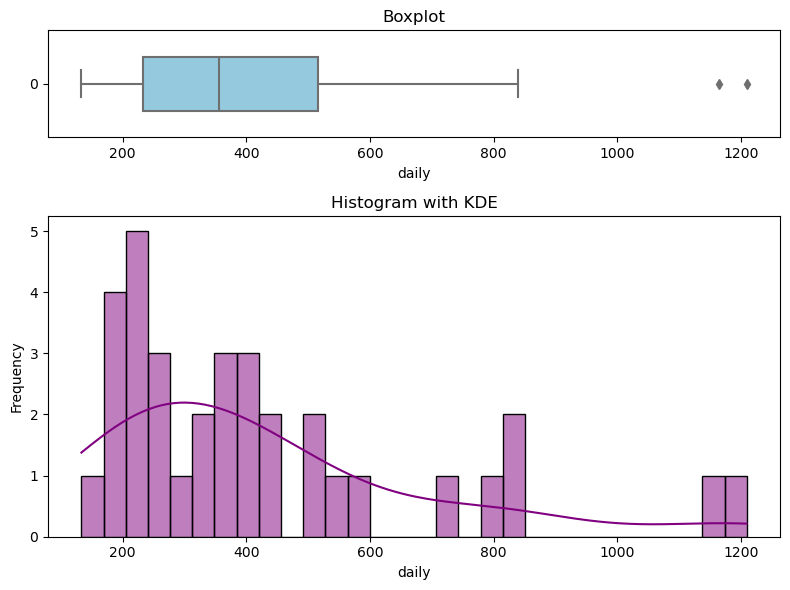

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(8,6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data1["daily"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("daily")

sns.histplot(data1['daily'], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("daily")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

## Observations
* The Daily column has values beyond 1100 as seen from the boxplot
* The same is confirmed from the right-skewed histogram

In [7]:
data1["daily"].describe()

count      34.000000
mean      430.962471
std       269.211470
min       133.239000
25%       233.021500
50%       355.235500
75%       516.616500
max      1209.225000
Name: daily, dtype: float64

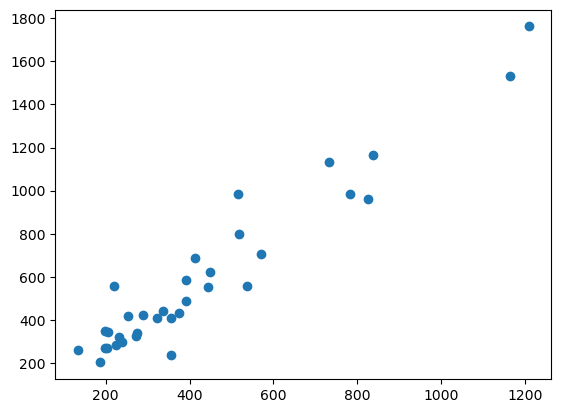

In [8]:
plt.scatter(data1["daily"], data1["sunday"])

In [9]:
#which exceeds .9 is an excellent correlation
data1["daily"].corr(data1["sunday"]) 

0.9581543140785462

In [12]:
#build regression model

import statsmodels.formula.api as smf
model = smf.ols("sunday~daily", data = data1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           6.02e-19
Time:                        11:32:50   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

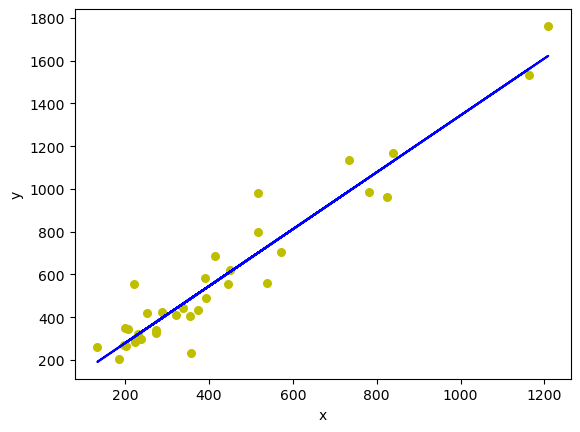

In [20]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x, y, color = "y", marker = "o", s = 30)
b0 = 13.84
b1 = 1.33

#predicted response vector
y_hat = b0 + b1*x

#plotting the regression line
plt.plot(x, y_hat, color = "b")

#putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()